<a href="https://colab.research.google.com/github/jchou03/art_era_ai/blob/main/art_era_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Data/ContemporaryDS340DB.csv')
df.info()

Mounted at /content/drive


FileNotFoundError: ignored

In [ ]:
import re
def extract_year_from_title(title):
    # Use regular expressions to find a 4-digit number in the title
    match = re.search(r'\b\d{4}\b', title)
    if match:
        year = int(match.group(0))
        return year
    else:
        match = re.search(r'(\d{4})s', title)
        if match:
          year = int(match.group(1))
          return year
        else:
          print("fail")


def getdecade(df):
  decade = []
  for i in range(len(df)):
    (title, year) = df.loc[i, "Title"], df.loc[i, "Year"]
    if year != 1972:
      decadeval = year - (year % 10)
      #print(decadeval, year)
      decade.append(decadeval)
    else:
      newyear = extract_year_from_title(title)
      decadeval = newyear - (newyear % 10)
      #print(decadeval, year)
      decade.append(decadeval)
  return decade


df['Decade'] = getdecade(df)
df = df.replace(4650, 1950)

<BarContainer object of 8 artists>

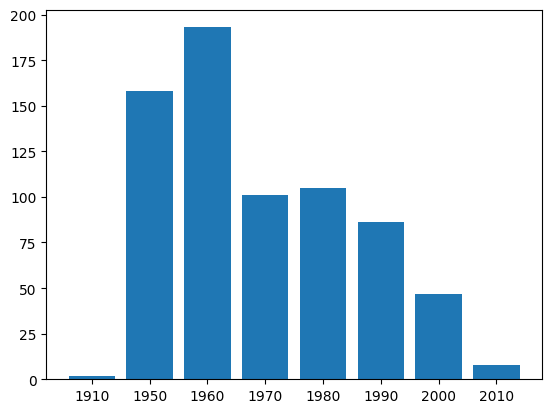

In [ ]:
#df.groupby(['Decade']).count()
x = ['1910', '1950', '1960', '1970', '1980', '1990', '2000', '2010']
y = [2, 158, 193, 101, 105, 86, 47, 8]
plt.bar(x, y)

In [ ]:
from pandas.core.frame import DataFrame
from IPython.display import HTML
def Create_Link(df):
  i = 0
  for x in range(len(df)):
    input = df.loc[x, "Image"]
    #index = df.loc[x, "index"]
    html = f'<a href={input}>{i}</a>'
    df = df.replace(input, html)
    i += 1
  return df


In [ ]:
df.to_csv('/content/drive/My Drive/Colab Data/art_era_ai_df.csv')

In [ ]:
labels = art_era_ai_df["Decade"]

In [ ]:
  from PIL import Image

  def get_largest(images):
  maxwidth, maxheight = images[0].size
  for x in images:
    width,height = img.size
    if width > maxwidth:
        maxwidth = width
    if height > maxheight:
        maxheight = height
  return maxwidth, maxheight

  def get_smallest(images):
  minwidth, minheight = images[0].size
  for x in images:
    width,height = img.size
    if width < minwidth:
        minwidth = width
    if height < minheight:
        minheight = height
  return maxwidth, maxheight


In [ ]:
from random import sample

def sampling(images):
  rand_samp = random.sample(images, 8)
  scale_down = [180, 255, 300]

  for value in scale_down:
    print("Scaling Down for", value)
    for x in rand_samp:
      plt.imshow(x/value)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

x_train, x_test, y_train, y_test = train_test_split#(VALUE TO CHANGE, VALUE TO CHANGE)

x_train = x_train/255 #VALUE TO CHANGE
x_test = x_test/255 #VALUE TO CHANGE

x_train = x_train.reshape((-1,28,28))
x_test = x_test.reshape((-1,28,28))


num_classes = #VALUE TO CHANGE
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (#VALUE TO CHANGE)


model = keras.Sequential(
    [
        keras.Input(shape=input_shape),#SUBJECT TO CHANGE
        layers.Rescaling(scale = 1./255),#SUBJECT TO CHANGE
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),#SUBJECT TO CHANGE
        layers.MaxPooling2D(pool_size=(2, 2)),#SUBJECT TO CHANGE
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),#SUBJECT TO CHANGE
        layers.MaxPooling2D(pool_size=(2, 2)),#SUBJECT TO CHANGE
        layers.Dense(1, activation=#SUBJECT TO CHANGE),

        #ALTERS
        layers.RandomRotation(0.1),  #SUBJECT TO CHANGE
        layers.RandomFlip("horizontal"),#SUBJECT TO CHANGE
        layers.Flatten(),#SUBJECT TO CHANGE
        layers.Dropout(0.5),#SUBJECT TO CHANGE

    ]
)

model.summary()

In [ ]:
#CODE CREDIT: LECTURE 12
# Architecture based on https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model
from tensorflow.keras import layers
# preprocess_input subtracts pixel mean values from the inputs,
# which is what VGG16 expected
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow_datasets as tfds


model7 = VGG16(include_top=False, input_shape=(180,180,3)) # we'll replace the "top" with our own layers
for layer in model7.layers:
    layer.trainable = False  # these won't learn
# add new classifier layers
flat = layers.Flatten()(model7.layers[-1].output) # connect to last layer of VGG
drop1 = layers.Dropout(0.5)(flat)
cls = layers.Dense(128, activation='relu')(drop1)
drop2 = layers.Dropout(0.5)(cls)
output = layers.Dense(1, activation='sigmoid')(drop2)  #SIGMOID CHANGE
# define new model
model7 = Model(inputs=model7.inputs, outputs=output)


# compile model

model7.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy']) #BINARY CROSS CHANGE

#FIT
model7.fit(train_ds, epochs=7,validation_data=val_ds)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])